In [ ]:
import mysql.connector
from mysql.connector import Error

# Replace these values with your connection details
host = '127.0.0.1'
user = 'root'
password = 'password'
database = 'F1TestSchema'

# Function to connect to the database
def create_connection():
    try:
        connection = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        if connection.is_connected():
            print("Connected to MySQL database")
        return connection
    except Error as e:
        print("Error while connecting to MySQL:", e)
        return None

In [47]:
def fetch_max_wins(connection):
    try:
        cursor = connection.cursor()
        query = """
       SELECT 
        d.Name AS DriverName
FROM 
    Driver d
WHERE 
    d.DriverId = (
        SELECT 
            ds.DriverId
        FROM 
            DriverStandings ds
        WHERE 
            ds.Wins = (SELECT MAX(Wins) FROM DriverStandings)
        LIMIT 1
    );
        """
        cursor.execute(query)
        result = cursor.fetchall()
        print("the driver who has the highest number of wins in a season.:")
        for row in result:
            print(row)
    except Error as e:
        print("Error:", e)

connection = create_connection()
if connection:
    fetch_max_wins(connection)
    connection.close()


Connected to MySQL database
the driver who has the highest number of wins in a season.:
('Max Verstappen',)


### Fetch Top 10 Drivers with Wins > 6

In [48]:
def fetch_top10_drivers_with_wins(connection):
    try:
        cursor = connection.cursor()
        query = """
        SELECT d.DriverID, d.SeasonID, t.DriverName, d.Wins, d.Ranking
        FROM DriverStandings d, Top10Drivers t, Season s
        WHERE d.DriverID = t.MainDriverID AND d.Wins > 6 AND d.SeasonID = s.SeasonID;
        """
        cursor.execute(query)
        result = cursor.fetchall()
        print("Top 10 Drivers with Wins > 6:")
        for row in result:
            print(row)
    except Error as e:
        print("Error:", e)

connection = create_connection()
if connection:
    fetch_top10_drivers_with_wins(connection)
    connection.close()


Connected to MySQL database
Top 10 Drivers with Wins > 6:
(1, 2024, 'Lewis Hamilton', 8, 7)
(3, 2024, 'George Russell', 13, 6)
(5, 2024, 'Max Verstappen', 18, 1)
(5, 2023, 'Max Verstappen', 15, 1)
(5, 2021, 'Max Verstappen', 15, 1)
(9, 2024, 'Charles Leclerc', 18, 3)
(10, 2024, 'Carlos Sainz', 15, 5)
(13, 2024, 'Lando Norris', 17, 2)


###  Fetch Top 10 Drivers and Their Teams

In [49]:
def fetch_top10_drivers_with_teams(connection):
    try:
        cursor = connection.cursor()
        query = """
        SELECT d.DriverID, d.TeamID, d.FromYear, d.ToYear, t.DriverName, team.TeamName
        FROM Drives d, Top10Drivers t, Team team
        WHERE d.DriverID = t.MainDriverID AND team.TeamID = d.TeamID;
        """
        cursor.execute(query)
        result = cursor.fetchall()
        print("Top 10 Drivers and Their Teams:")
        for row in result:
            print(row)
    except Error as e:
        print("Error:", e)

connection = create_connection()
if connection:
    fetch_top10_drivers_with_teams(connection)
    connection.close()


Connected to MySQL database
Top 10 Drivers and Their Teams:
(1, '1', '2013', '2024', 'Lewis Hamilton', 'Mercedes-AMG Petronas F1 Team')
(2, '1', '2017', '2021', 'Valtteri Bottas', 'Mercedes-AMG Petronas F1 Team')
(3, '1', '2022', '2024', 'George Russell', 'Mercedes-AMG Petronas F1 Team')
(5, '2', '2016', '2024', 'Max Verstappen', 'Red Bull Racing')
(6, '2', '2021', '2024', 'Sergio Perez', 'Red Bull Racing')
(9, '3', '2019', '2024', 'Charles Leclerc', 'Scuderia Ferrari')
(10, '3', '2021', '2024', 'Carlos Sainz', 'Scuderia Ferrari')
(6, '4', '2014', '2016', 'Sergio Perez', 'McLaren F1 Team')
(2, '5', '2022', '2024', 'Valtteri Bottas', 'Alpine F1 Team')
(13, '7', '2019', '2024', 'Lando Norris', 'Scuderia AlphaTauri')
(14, '7', '2019', '2020', 'Daniel Ricciardo', 'Scuderia AlphaTauri')
(7, '9', '2022', '2024', 'Alexander Albon', 'Haas F1 Team')


### Analysis on the Database!!

Connected to MySQL database


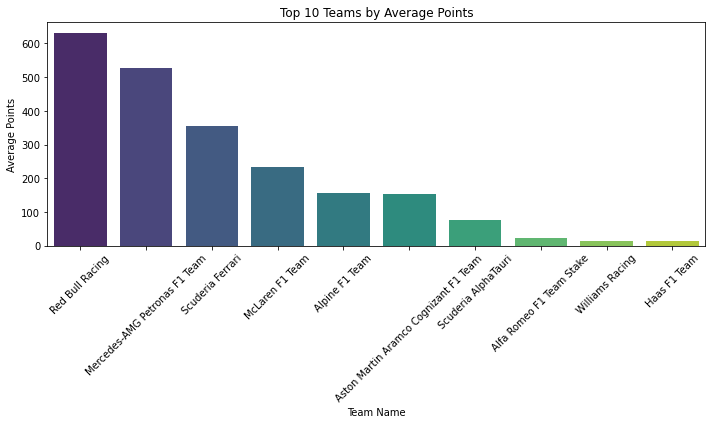

In [50]:
        
# Function to fetch data and plot the graph (Example for Team Performance)
def fetch_and_plot_top_teams_avg_points(connection):
    try:
        query = """
        SELECT 
            t.TeamName,
            AVG(cs.Points) AS AvgPoints
        FROM 
            ConstructorStandings cs
        JOIN 
            Team t ON cs.TeamId = t.TeamId
        GROUP BY 
            t.TeamName
        ORDER BY 
            AvgPoints DESC
        LIMIT 10;
        """
        cursor = connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        
        # Extract data for plotting
        teams = [row[0] for row in result]
        avg_points = [row[1] for row in result]

        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x=teams, y=avg_points, palette='viridis')
        plt.title('Top 10 Teams by Average Points')
        plt.xlabel('Team Name')
        plt.ylabel('Average Points')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Error as e:
        print("Error:", e)
        
# Main Code to Execute Queries and Plot
connection = create_connection()

if connection:
    #Team Points Distribution in a Specific Season
    fetch_and_plot_top_teams_avg_points(connection)
    
    # Close the connection
    connection.close()



Connected to MySQL database


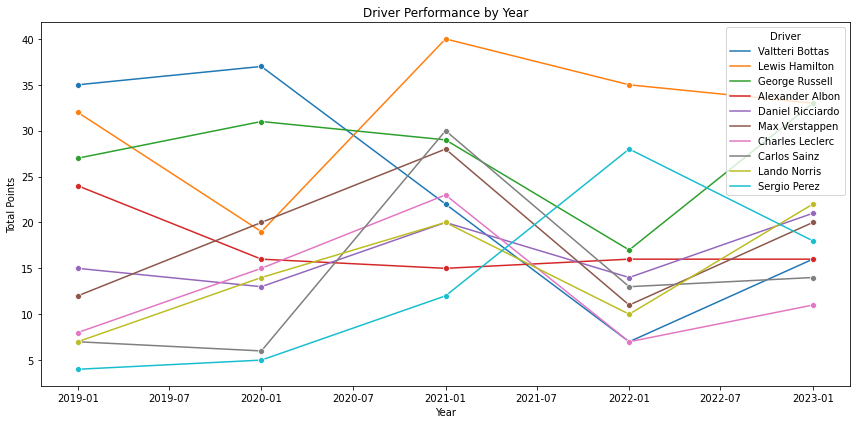

In [51]:
# Function to fetch data and plot the graph (Example for Driver Performance)
def fetch_and_plot_driver_performance_by_year(connection):
    try:
        query = """
        SELECT 
            s.Year,
            d.Name AS DriverName,
            SUM(ps.PointsScored) AS TotalPoints,
            COUNT(r.RaceId) AS RacesParticipated
        FROM 
            PerformanceStatistics ps
        JOIN 
            Driver d ON ps.DriverId = d.DriverId
        JOIN 
            Race r ON ps.RaceId = r.RaceId
        JOIN 
            Season s ON r.SeasonId = s.SeasonId
        GROUP BY 
            s.Year, d.DriverId
        ORDER BY 
            s.Year, TotalPoints DESC;
        """
        cursor = connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        
        # Extract data for plotting
        years = [row[0] for row in result]
        driver_names = [row[1] for row in result]
        total_points = [row[2] for row in result]

        # Plotting the line chart for performance by year
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=years, y=total_points, hue=driver_names, marker='o')
        plt.title('Driver Performance by Year')
        plt.xlabel('Year')
        plt.ylabel('Total Points')
        plt.tight_layout()
        plt.legend(title='Driver')
        plt.show()

    except Error as e:
        print("Error:", e)

# Main Code to Execute Queries and Plot
connection = create_connection()

if connection:
    #Team Points Distribution in a Specific Season
    fetch_and_plot_driver_performance_by_year(connection)
    
    # Close the connection
    connection.close()


Connected to MySQL database


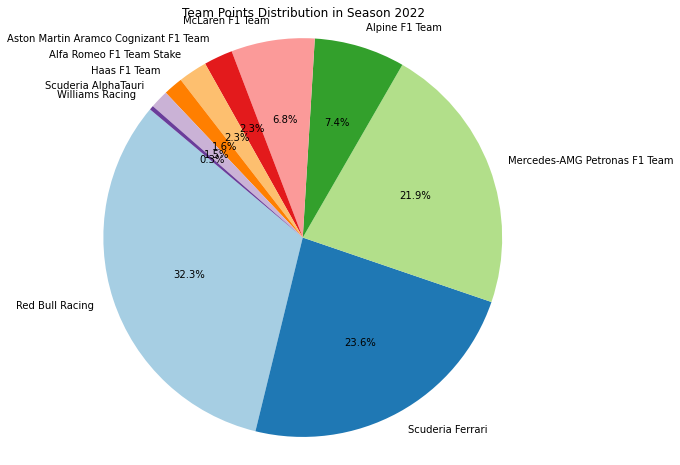

In [52]:
# Function to fetch data and plot the pie chart (Example for Team Points Distribution)
def fetch_and_plot_team_points_distribution(connection, season_id):
    try:
        query = """
        SELECT 
            t.TeamName,
            cs.Points
        FROM 
            ConstructorStandings cs
        JOIN 
            Team t ON cs.TeamId = t.TeamId
        WHERE 
            cs.SeasonId = %s
        ORDER BY 
            cs.Points DESC;
        """
        cursor = connection.cursor()
        cursor.execute(query, (season_id,))
        result = cursor.fetchall()

        # Extract data for the pie chart
        team_names = [row[0] for row in result]
        points = [row[1] for row in result]

        if len(team_names) == 0:
            print(f"No data available for Season ID: {season_id}")
            return

        # Plotting the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(points, labels=team_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title(f"Team Points Distribution in Season {season_id}")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

    except Error as e:
        print("Error:", e)

# Main Code to Execute Queries and Plot
connection = create_connection()

if connection:
    #Team Points Distribution in a Specific Season
    fetch_and_plot_team_points_distribution(connection, 2022)
    
    # Close the connection
    connection.close()
